In [264]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')


In [265]:
# Reading data from csv file to analyze the 'Customer Churn'
ds = pd.read_csv('Customer_Churn.csv')
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [266]:
print ('Initial shape of the dataset', ds.shape)

Initial shape of the dataset (7043, 21)


In [267]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (7043, 21)
Shape of dataset after removing duplicates:  (7043, 21)


In [268]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [269]:
# Checking the columns of dataset
ds.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [270]:
# Checking the data types of dataset
ds.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [271]:
# Checking the dataset columns information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Summarize the 'Customer Churn' distribution

In [272]:
from collections import Counter

target = ds.values[:,-1]
counter = Counter(target)

for k, v in counter.items():
    per = v/len(target) * 100
    print ('Customer churn = %s, Count=%d, Percentage=%.3f%%' %(k, v, per) )

Customer churn = No, Count=5174, Percentage=73.463%
Customer churn = Yes, Count=1869, Percentage=26.537%


In [273]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32'])
ds_int.columns

Index(['SeniorCitizen', 'tenure'], dtype='object')

In [274]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

# checking the 'Customer Churn' based on multiple features

In [275]:
ds.groupby(['gender'])['Churn'].count()

gender
Female    3488
Male      3555
Name: Churn, dtype: int64

In [276]:
ds.groupby(['PaymentMethod'])['Churn'].count()

PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: Churn, dtype: int64

In [277]:
ds.groupby(['Contract'])['Churn'].count()

Contract
Month-to-month    3875
One year          1473
Two year          1695
Name: Churn, dtype: int64

In [278]:
ds.groupby(['SeniorCitizen'])['Churn'].count()

SeniorCitizen
0    5901
1    1142
Name: Churn, dtype: int64

In [279]:
ds.groupby(['tenure'])['Churn'].count()

tenure
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: Churn, Length: 73, dtype: int64

In [280]:
ds.groupby(['InternetService'])['Churn'].count()

InternetService
DSL            2421
Fiber optic    3096
No             1526
Name: Churn, dtype: int64

# Statistical Summary

In [281]:
ds.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Mean is greater than median, it seems outliers are present in the dataset

In [282]:
# Checking for null values
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [283]:
# Checking for null values
ds.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

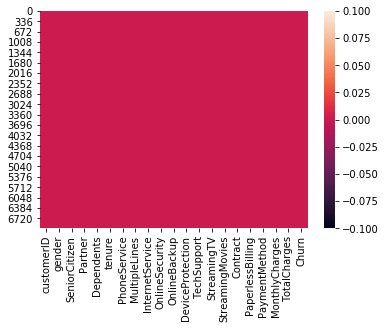

In [284]:
# Checking null values through heatmap visualization
sns.heatmap(ds.isnull())

# Checking the corelation

In [285]:
ds.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


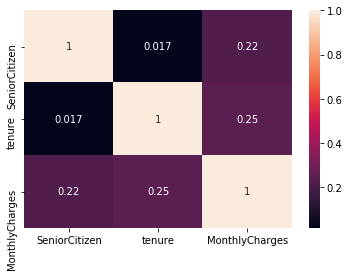

In [286]:
# Corelation through heatmap visualization
sns.heatmap(ds.corr(), annot=True)

# Countplots for features

Univariate Analysis

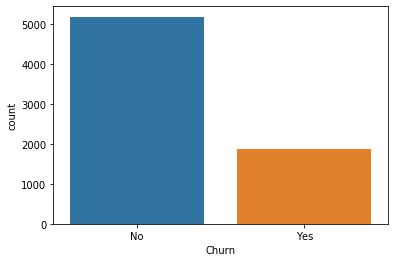

In [287]:
sns.countplot(ds['Churn'])

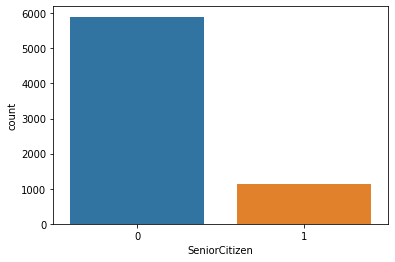

In [288]:
sns.countplot(ds['SeniorCitizen'])

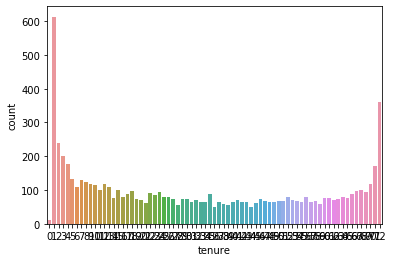

In [289]:
sns.countplot(ds['tenure'])

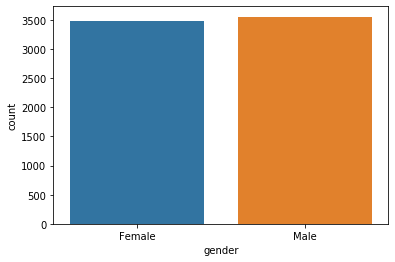

In [290]:
sns.countplot(ds['gender'])

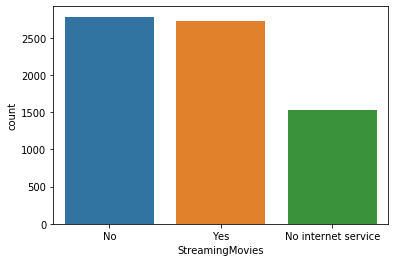

In [291]:
sns.countplot(ds['StreamingMovies'])

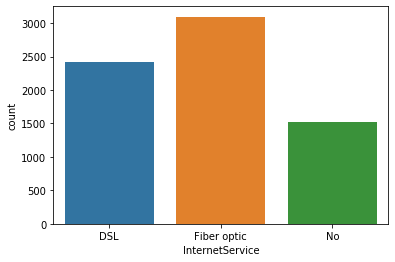

In [292]:
sns.countplot(ds['InternetService'])

# Pichart

([<matplotlib.patches.Wedge at 0x17acf783948>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')])

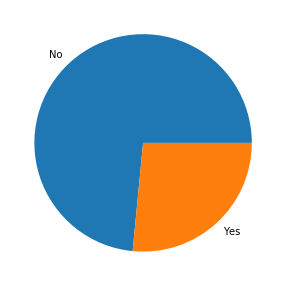

In [293]:
plt.figure(figsize=(10,5))
plt.pie(ds['Churn'].value_counts(), labels=ds.Churn.unique())

LabelEncoder is used to convert categorical data to number data

In [294]:
le = LabelEncoder()
for i in ds_cat:
    ds[i] = le.fit_transform(ds[i])

In [295]:
ds.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

# Violinplot

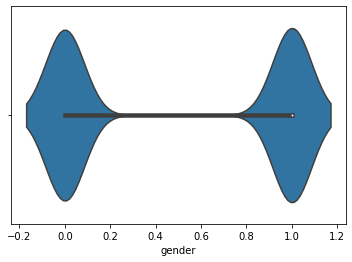

In [296]:
sns.violinplot(ds['gender'])

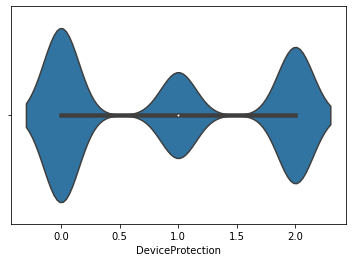

In [297]:
sns.violinplot(ds['DeviceProtection'])

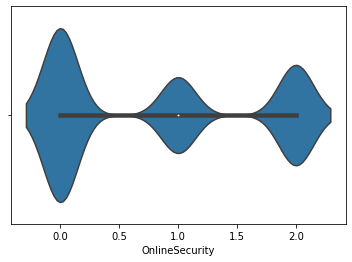

In [298]:
sns.violinplot(ds['OnlineSecurity'])

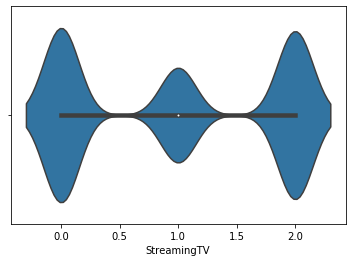

In [299]:
sns.violinplot(ds['StreamingTV'])

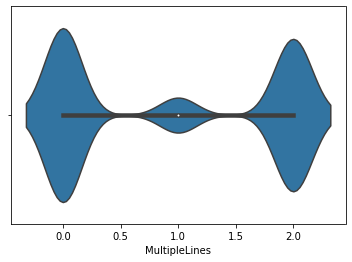

In [300]:
sns.violinplot(ds['MultipleLines'])

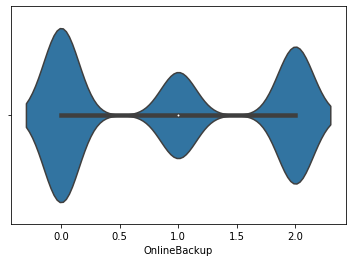

In [301]:
sns.violinplot(ds['OnlineBackup'])

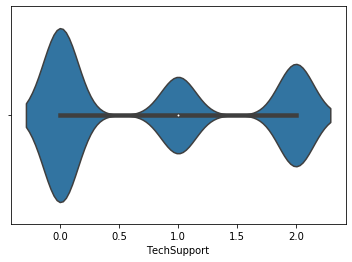

In [302]:
sns.violinplot(ds['TechSupport'])

# Histograms

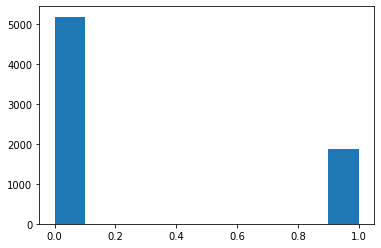

In [303]:
plt.hist(ds['Churn'])
plt.show()

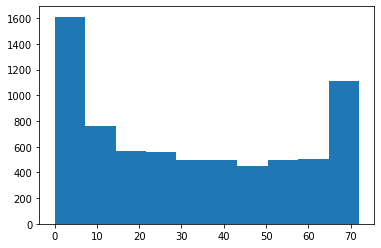

In [304]:
plt.hist(ds['tenure'])
plt.show()

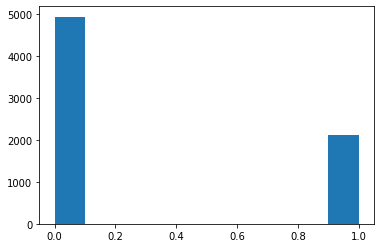

In [305]:
plt.hist(ds['Dependents'])
plt.show()

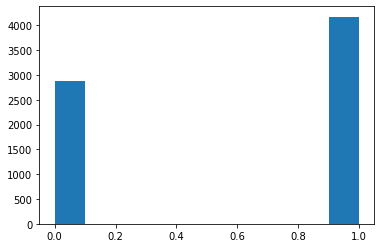

In [306]:
plt.hist(ds['PaperlessBilling'])
plt.show()

# Plotting outliers

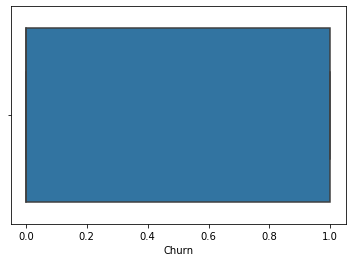

In [307]:
sns.boxplot(ds['Churn'])

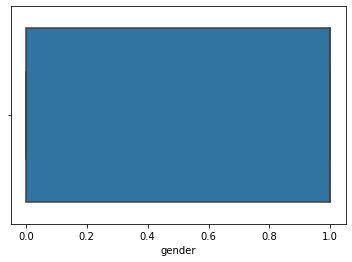

In [308]:
sns.boxplot(ds['gender'])

In [309]:
collist = ds.columns.values
collist

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [310]:
nrows = 12
ncols = 12

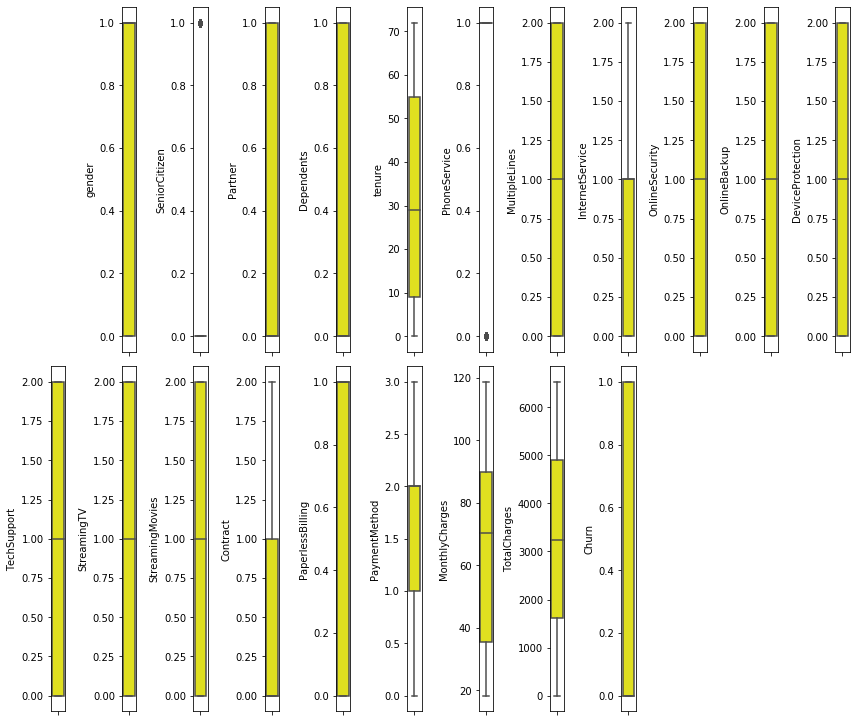

In [311]:
plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(ds[collist[i]], color='yellow', orient='v')
    plt.tight_layout()

It seems outliers are present in the dataset, we need to remove it

# Distribution plots to check skewness of data

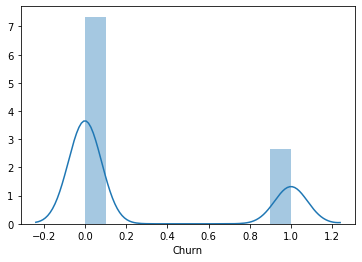

In [312]:
sns.distplot(ds['Churn'])

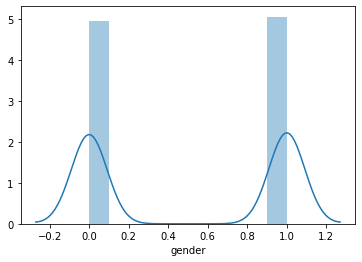

In [313]:
sns.distplot(ds['gender'])

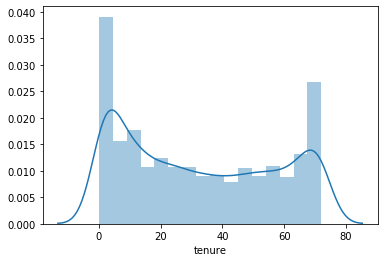

In [314]:
sns.distplot(ds['tenure'])

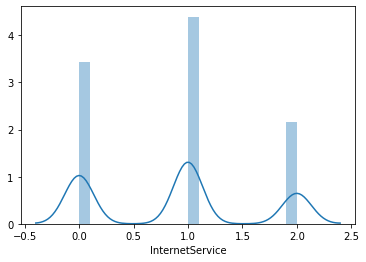

In [315]:
sns.distplot(ds['InternetService'])

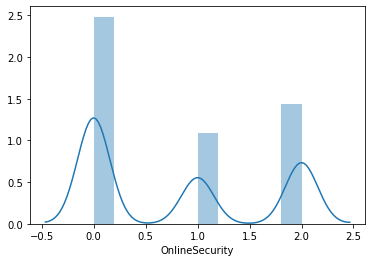

In [316]:
sns.distplot(ds['OnlineSecurity'])

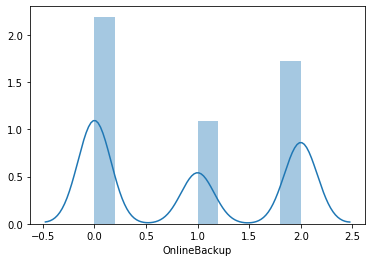

In [317]:
sns.distplot(ds['OnlineBackup'])

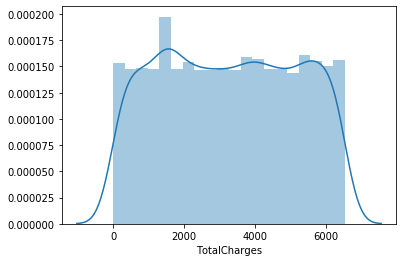

In [318]:
sns.distplot(ds['TotalCharges'])

It seems data is not normally distributed, data is skewed

# Bivariate Analysis

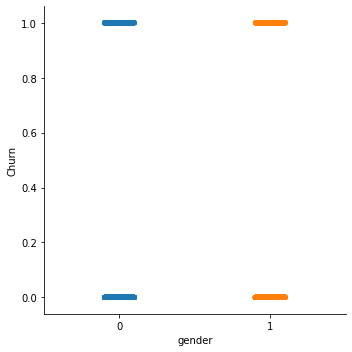

In [319]:
sns.catplot(x='gender', y='Churn', data=ds)

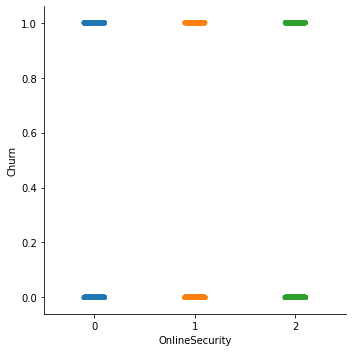

In [320]:
sns.catplot(x='OnlineSecurity', y='Churn', data=ds)
plt.show()

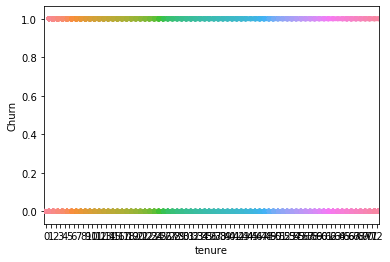

In [321]:
sns.swarmplot(x='tenure', y='Churn', data=ds)
plt.show()

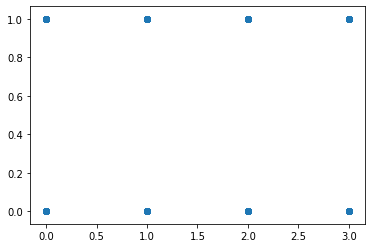

In [322]:
plt.scatter(ds['PaymentMethod'], ds['Churn'])
plt.show()

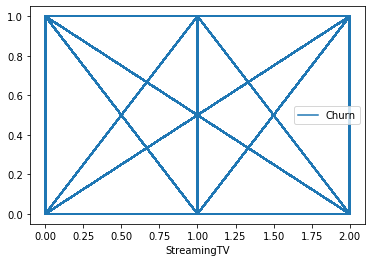

In [323]:
ds.plot(x='StreamingTV', y='Churn', kind='line')
plt.show()

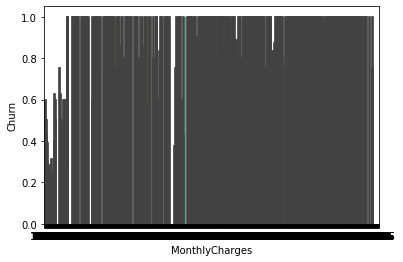

In [324]:
sns.barplot(x='MonthlyCharges', y='Churn', data=ds)
plt.show()

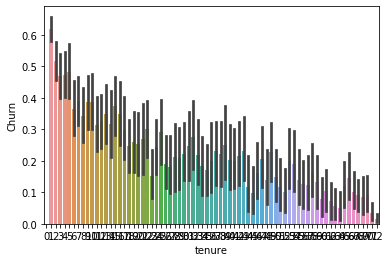

In [325]:
sns.barplot(x='tenure', y='Churn', data=ds)
plt.show()

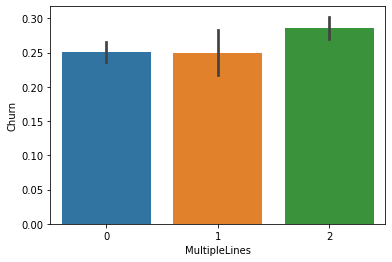

In [326]:
sns.barplot(x='MultipleLines', y='Churn', data=ds)
plt.show()

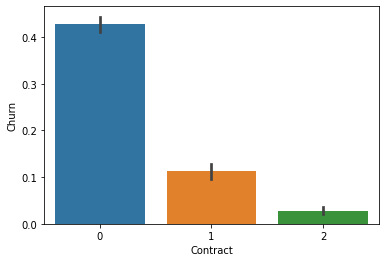

In [327]:
sns.barplot(x='Contract', y='Churn', data=ds)
plt.show()

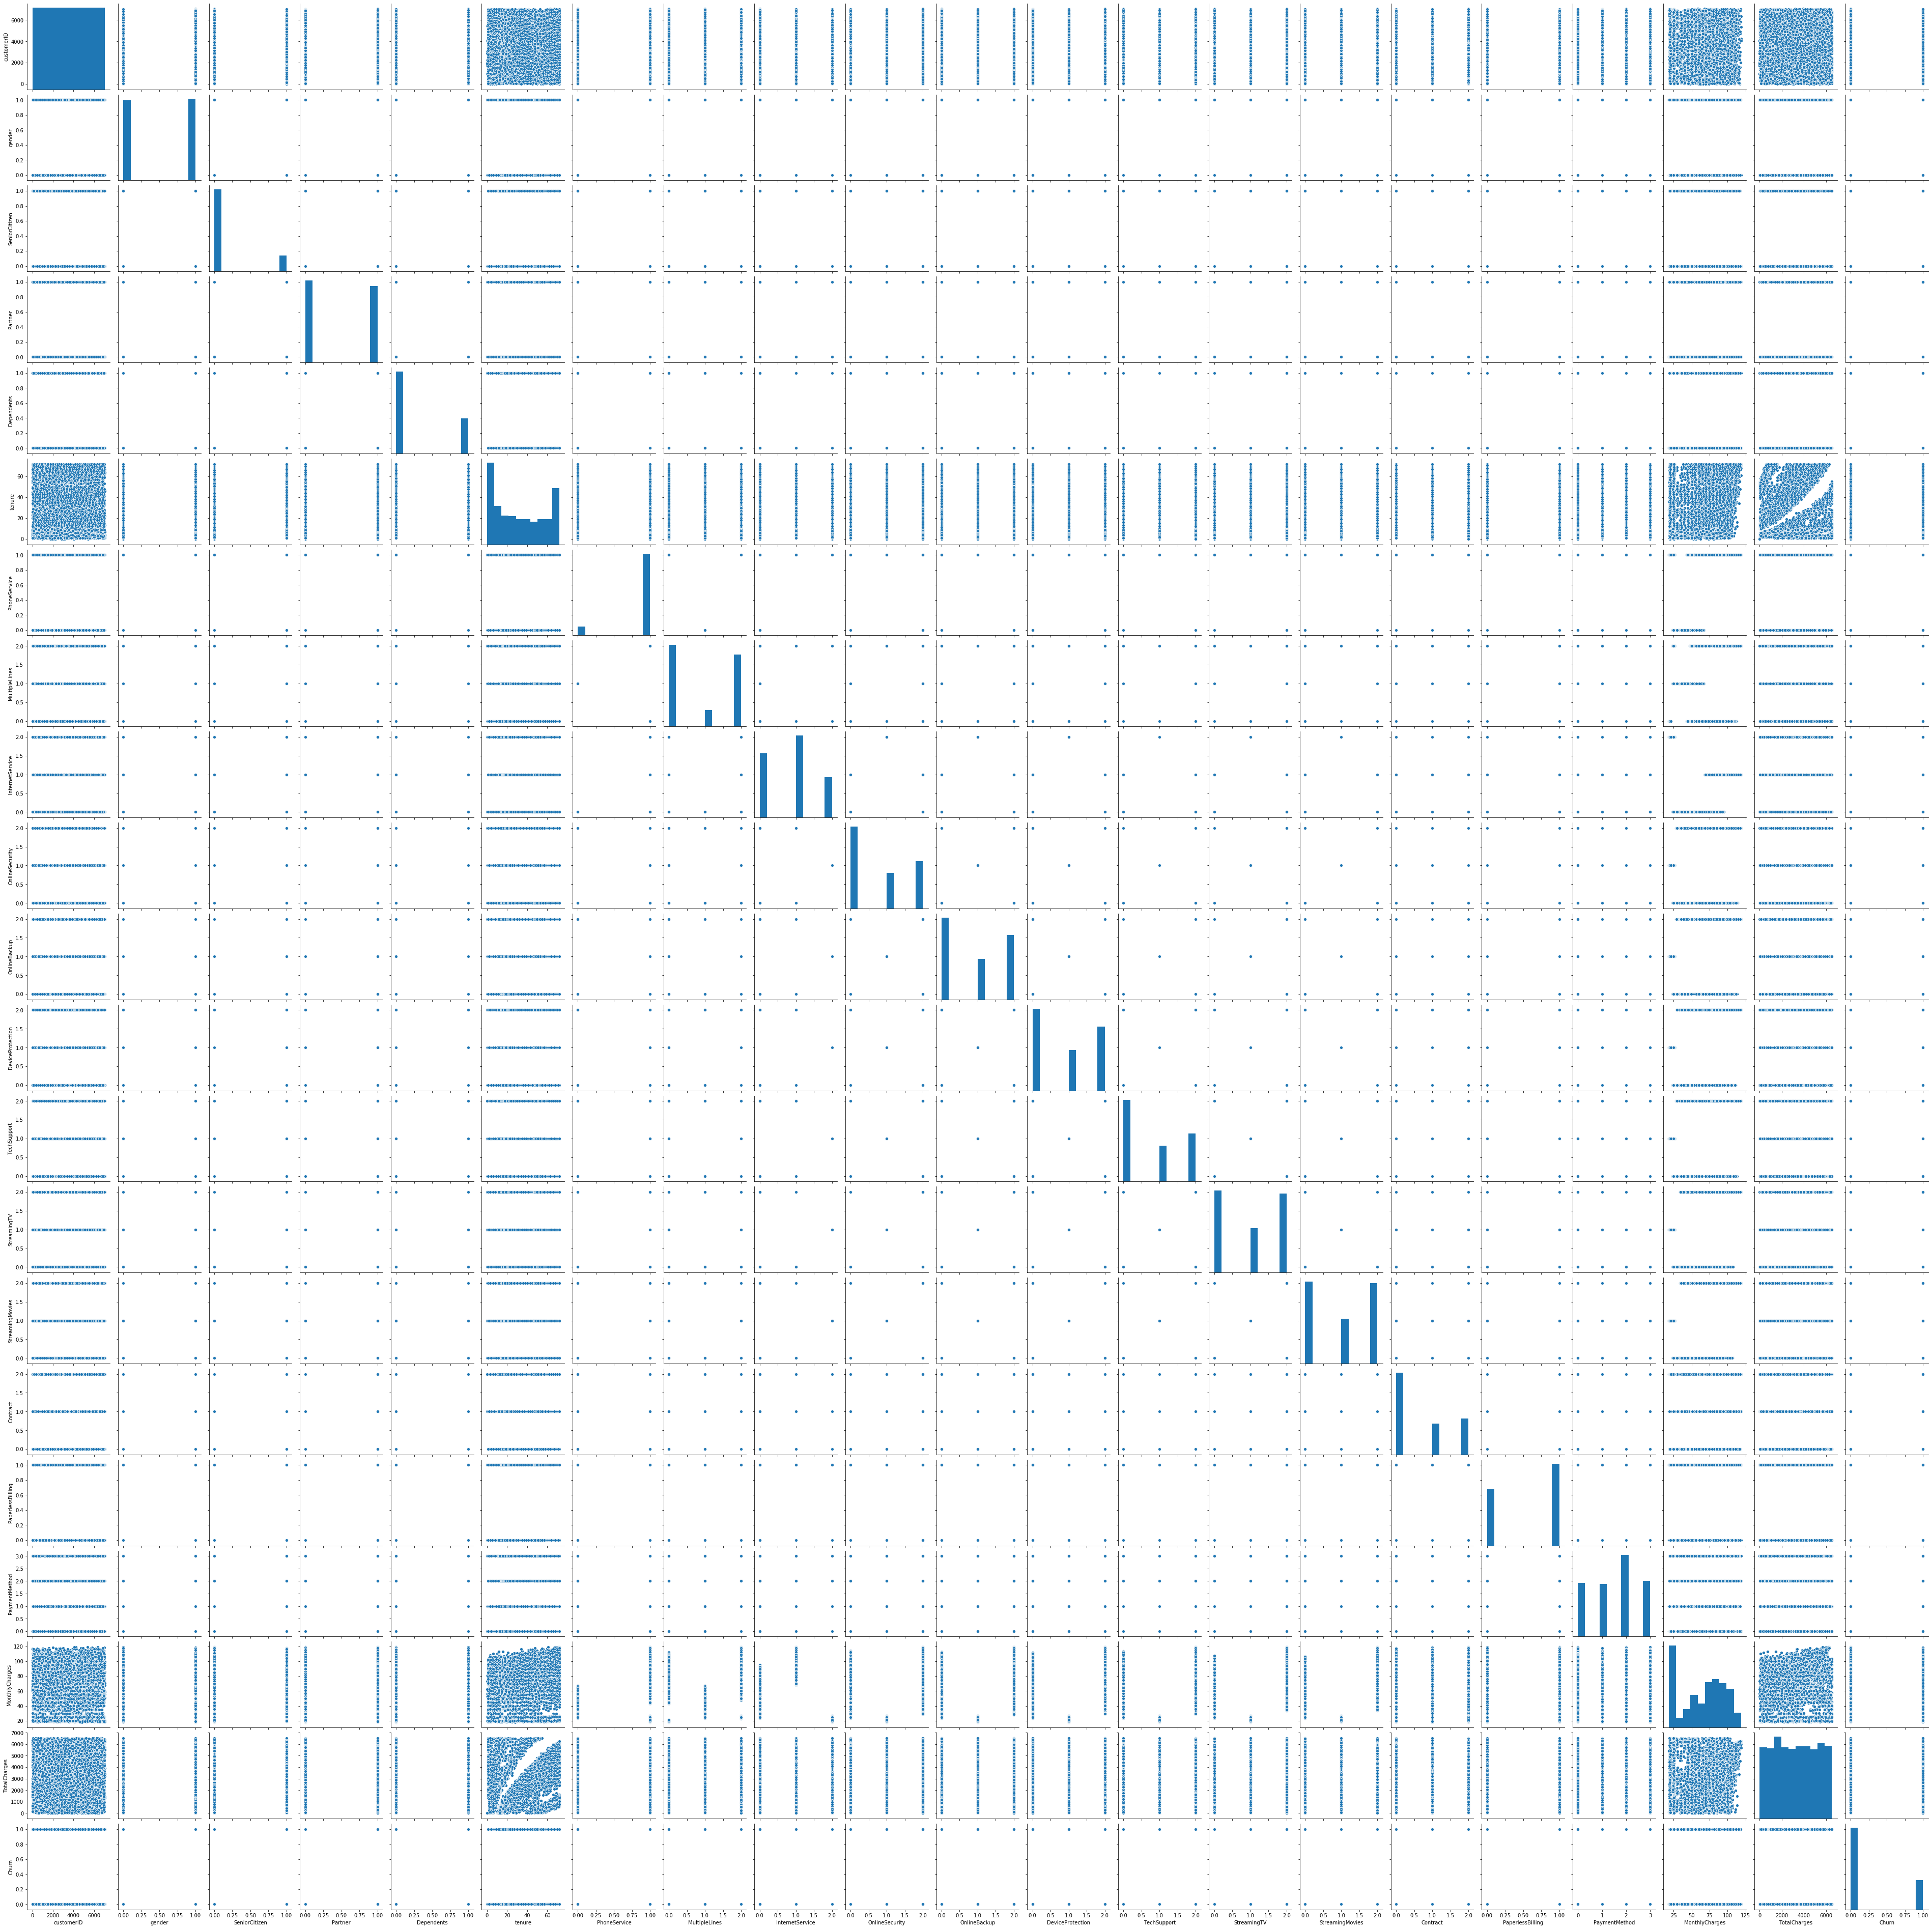

In [328]:
sns.pairplot(ds)
plt.show()

Checking the 'z score' / outliers of the dataset, if present, will remove it

In [329]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (7043, 21)
After removing zscore:  (6361, 21)


In [330]:
ds_final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
5,6551,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,6104,1
6,1002,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1550,0


In [331]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['Churn'])
y = ds_final['Churn']

In [332]:
y.unique()

array([0, 1])

In [333]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [334]:
x.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
dtype: float64

In [335]:
(x.shape, y.shape)

((6361, 20), (6361,))

In [336]:
# Remove skewness 
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.sqrt(x[col])

In [337]:
x.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       0.000000
Partner             0.056316
Dependents          0.000000
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract           -0.144405
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
dtype: float64

In [338]:
# Replacing nan values with 0
x.replace(np.NaN, 0, inplace=True)

# Classification algorithm for dataset with target column as 'Churn'

In [339]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [340]:
# algorithms used for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [341]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LR = LogisticRegression()
GNB =  GaussianNB()

In [342]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTraeeClassifier', DT))
models.append(('RandomForestClassifier', RFC))
models.append(('LogisticRegression', LR))
models.append(('GaussianNB', GNB))

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  51  is:  0.776904948939513
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Predicted values:  [0 0 0 ... 0 0 1]


Accuracy score:  0.776904948939513


cross val score:  0.7580571270598224


[0.         0.13116474 1.        ] [0.       0.503125 1.      ] [2 1 0]
roc auc score:  0.6859801285414481


classification report:                precision    recall  f1-score   support

           0       0.84      0.87      0.85       953
           1       0.56      0.50      0.53       320

    accuracy                           0.78      1273
   macro avg       0.70      0.69      0.69      1273
weighted avg       0.77      0.78      0.77      1273



[[828 125]
 [159 161]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************** SVC *************

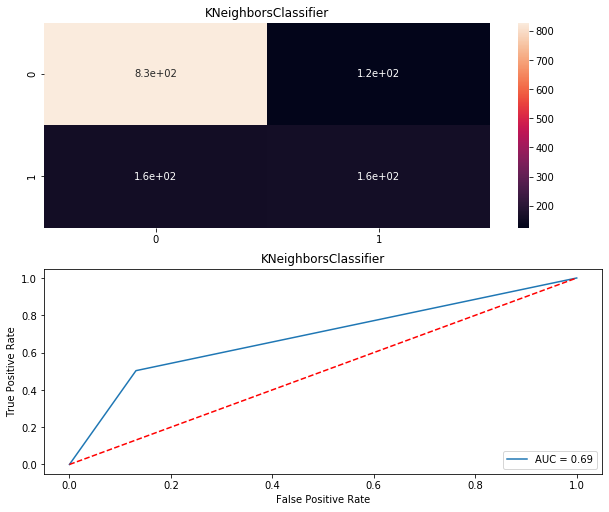

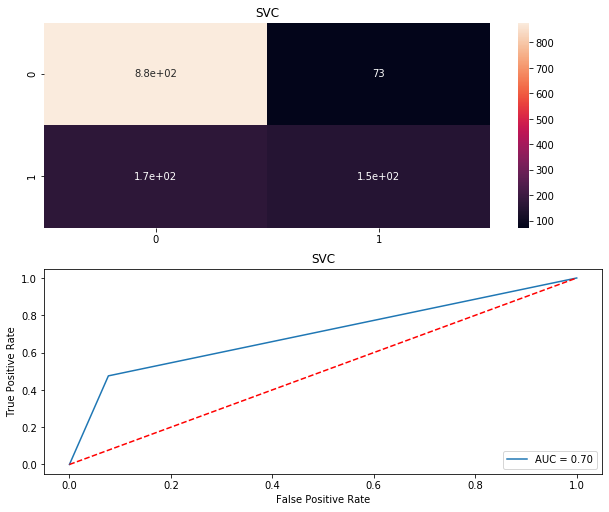

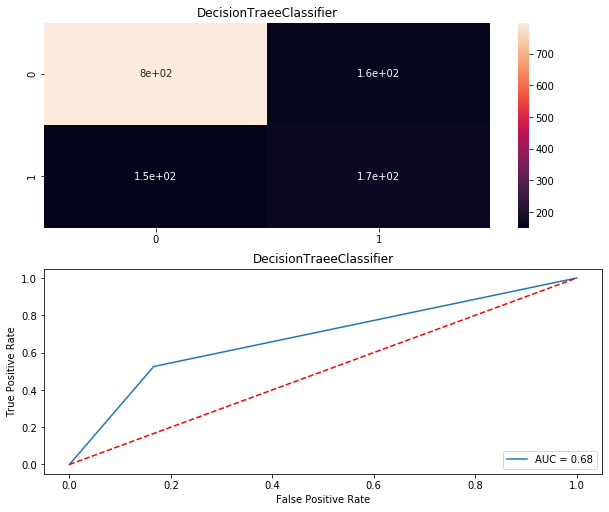

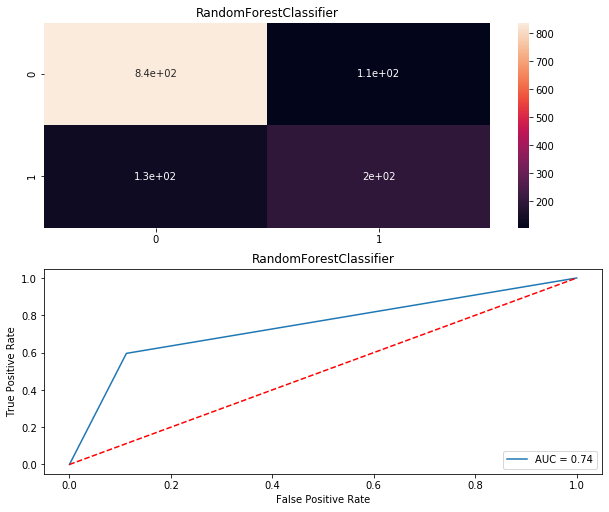

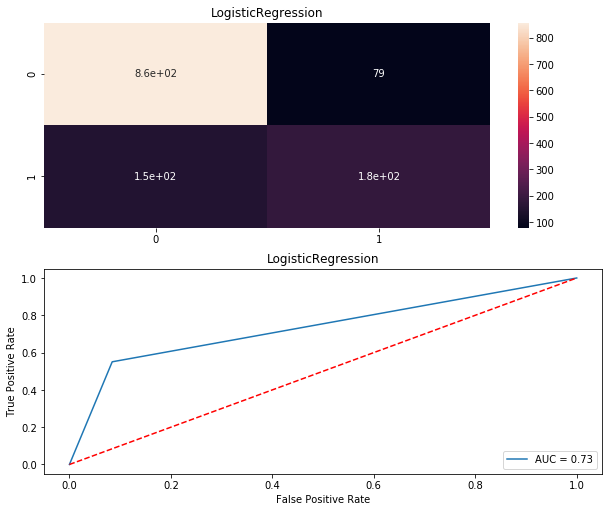

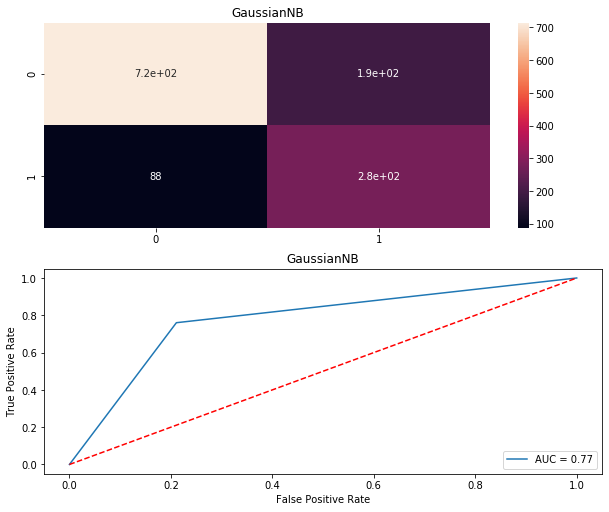

In [343]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .20)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [344]:
# Displaying the data in tabular form
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

,Model,Accuracy_Score,Cross Val Score,ROC_AUC_Curve,RandomState
0,KNeighborsClassifier,77.690495,75.805713,68.598013,51
1,SVC,80.989788,79.735963,69.919699,49
2,DecisionTraeeClassifier,75.726630,72.048221,67.958613,84
3,RandomForestClassifier,81.225452,79.405675,74.172827,87
4,LogisticRegression,81.932443,80.380518,73.314180,60
5,GaussianNB,78.083268,75.553992,77.470060,52


In [345]:
param = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
gsc = GridSearchCV(estimator = LR, param_grid = param, cv=10)

In [346]:
gsc.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [347]:
gsc.best_params_

{'C': 0.09, 'penalty': 'l2'}

In [348]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=60, test_size = 0.20)
lreg = LogisticRegression(C= 0.09, penalty= 'l2' )
lreg.fit(x_train, y_train)
y_pred =  lreg.predict(x_test)
print (y_pred)

[0 0 0 ... 0 1 0]


In [349]:
# Saving the predicted values in csv files
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_customer_churn.csv')

accuracy score:  0.8208955223880597
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       937
           1       0.71      0.54      0.62       336

    accuracy                           0.82      1273
   macro avg       0.78      0.73      0.75      1273
weighted avg       0.81      0.82      0.81      1273

Confusion_matrix:  [[862  75]
 [153 183]]
cross val score:  0.804906055310368
roc auc score:  0.7323000838542462
AxesSubplot(0.125,0.808774;0.62x0.0712264)





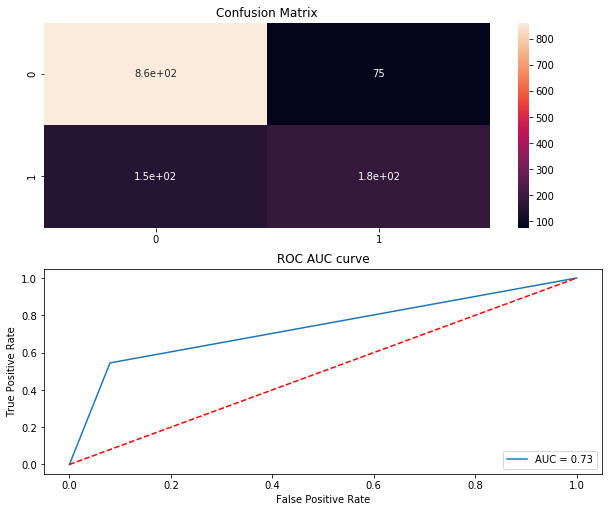

In [350]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(lreg, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [352]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(lreg, 'project_customer_churn.pkl')
#clf = joblib.load('project_customer_churn.pkl')
#clf.predict(x_test)

['project_customer_churn.pkl']